# Tutorial Sfepy

https://sfepy.org/doc-devel/tutorial.html#

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sfepy.discrete.fem import Mesh, FEDomain, Field
from sfepy import data_dir
import os

Finite element mesh

sfepy:         reading mesh (C:\Users\lucas\anaconda3\envs\pde-env\Lib\site-packages\sfepy\meshes\2d\rectangle_tri.mesh)...
sfepy:           number of vertices: 258
sfepy:           number of cells:
sfepy:             2_3: 454
sfepy:         ...done in 0.00 s


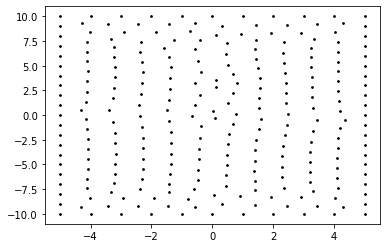

In [26]:
mesh = Mesh.from_file(os.path.join(data_dir, 'meshes', '2d', 'rectangle_tri.mesh'))
plt.scatter(mesh.coors[:,0], mesh.coors[:,1], s=3, color='k')
plt.show()

Creating the domain

In [27]:
domain = FEDomain('domain', mesh)

Defining the space $\Omega$ and the boundary $\Gamma_1, \Gamma_2$

In [31]:
min_x, max_x = domain.get_mesh_bounding_box()[:, 0]
eps = 1e-8 * (max_x - min_x)
omega = domain.create_region('Omega', 'all')
gamma1 = domain.create_region('Gamma1',
                              'vertices in x < %.10f' % (min_x + eps),
                              'facet')
gamma2 = domain.create_region('Gamma2',
                              'vertices in x > %.10f' % (max_x - eps),
                              'facet')

The Field commmand creates the finite elements approximation

In [32]:
field = Field.from_args('fu', np.float64, 'vector', omega,
                        approx_order=2)

In [38]:
field.

array([[ -5.        , -10.        ],
       [  5.        , -10.        ],
       [ -4.        , -10.        ],
       ...,
       [ -0.28636101,  -0.19847234],
       [  0.40018926,   0.27400907],
       [  0.05715114,   0.03915021]])